In [6]:
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

def get_jobs(keyword, num_jobs, verbose):    
    
    options = webdriver.ChromeOptions()
    options.add_argument('--disable-application-cache')

    
    driver = webdriver.Chrome(executable_path='C:/Users/HP/driver/chromedriver.exe',options=options)
    driver.set_window_size(1120, 1000)
    url = "https://www.glassdoor.com/Job/jobs.htm?suggestCount=0&suggestChosen=false&clickSource=searchBtn&typedKeyword="+keyword+"&sc.keyword="+keyword+"&locT=&locId=&jobType="
    driver.get(url)
    jobs = []
    
    for i in range(int(num_jobs/30)+1):
#         if len(jobs)%30==0 :
            try:
                driver.find_element(By.XPATH,'//button[@class="button_Button__meEg5 button-base_Button__9SPjH" and @data-test="load-more"]').click()
#                 print("clicked !!")
            except NoSuchElementException:
                print("Scraping terminated before reaching target number of jobs. Needed {}, got {}.".format(num_jobs, len(jobs)))
                break
                
            time.sleep(5)  
            try:
                driver.find_element(By.XPATH,'//button[@class="CloseButton"]').click()
            except NoSuchElementException:
                pass
            except ElementClickInterceptedException:
                pass

    while len(jobs) < num_jobs:  #If true, should be still looking for new jobs.
        
        time.sleep(4)
        print("len(jobs): {}".format("" + str(len(jobs)))) 
        
        #Going through each job in this page  data-test="jobListing"
        job_buttons = driver.find_elements(By.CLASS_NAME,'JobsList_jobListItem__JBBUV')  # for Job Listing. These are the buttons we're going to click.       
        print("len(job_buttons): {}".format("" + str(len(job_buttons))))
        
        for job_button in job_buttons:
            
            print("Progress: {}".format("" + str(len(jobs)) + "/" + str(num_jobs)))         
            if len(jobs) >= num_jobs:
                break

            # https://www.glassdoor.com/partner/jobListing.htm?pos=301&ao=1136043&s=58&guid=0000018d3b40ee108d0ccae56204319e&src=GD_JOB_AD&t=SR&vt=w&cs=1_c1736088&cb=1706096127828&jobListingId=1009088483487&jrtk=5-yul1-0-1hktk1ri0202h000-79e3e71bc1d618d5
            time.sleep(5)
            job_button.click()  # print("job_button: {}".format("" + str(job_button)))
            time.sleep(5)        
            collected_successfully = False      
            while not collected_successfully: 
                
                    
                time.sleep(5)
                
                try:
                    driver.find_element(By.XPATH,'//button[@class="CloseButton"]').click()
                except NoSuchElementException:
                    pass
                except ElementClickInterceptedException:
                    pass
                
                try:  
                                        # Locate the element containing the "alt" tag
                    try:
                        job_details = driver.find_element(By.CLASS_NAME, "JobDetails_jobDetailsHeader__qKuvs")
                        employer_profile = job_details.find_element(By.CLASS_NAME, "EmployerProfile_profileContainer__d5rMb")
                        logo_img = employer_profile.find_element(By.TAG_NAME, "img")
                        alt_text = logo_img.get_attribute("alt")  # Extract the "alt" text
                        company_name= alt_text                    
                    except NoSuchElementException:
                        company_name = "UNKNOWN "  
                        
                    location = driver.find_element(By.XPATH,'//div[@class="JobDetails_location__MbnUM" and @data-test="location"]').text
                    job_title = driver.find_element(By.XPATH,'//h1[@class="JobDetails_jobTitle__Rw_gn"]').text
                    job_description = driver.find_element(By.XPATH,'//*[@id="app-navigation"]/div[3]/div[2]/div[2]/div[1]/section/div[1]/div[1]').text
                    collected_successfully = True
                except:
                    time.sleep(5)
                    
                try:
                    rating = driver.find_element(By.XPATH,'//*[@id="rating-headline"]').text
                except NoSuchElementException:
                    rating = -1 
                    
                try:   
                          # Use a combination of class name and text content to locate the element
                    salary_estimate = driver.find_element(By.CLASS_NAME, "SalaryEstimate_averageEstimate__xF_7h").text  # Find by class name                 
                except NoSuchElementException:
                    salary_estimate = -1 #You need to set a "not found value. It's important."
    
            #Printing for debugging
                if verbose:
                    print("Company Name: {}".format(company_name))
                    print("Rating: {}".format(rating))
                    print("Job Title: {}".format(job_title))
                    print("Location: {}".format(location))
                    print("Salary Estimate: {}".format(salary_estimate))                   
                    print("Job Description: {}".format(job_description[:800]))

                try:
        
                    try:
                        size = driver.find_element(By.XPATH,'//*[@id="app-navigation"]/div[3]/div[2]/div[2]/div[1]/section/section[2]/div/div/div[1]/div').text
                    except NoSuchElementException:
                        size = -1
                    time.sleep(2)

                    try:
                        founded = driver.find_element(By.XPATH,'//*[@id="app-navigation"]/div[3]/div[2]/div[2]/div[1]/section/section[2]/div/div/div[2]/div').text
                    except NoSuchElementException:
                        founded = -1
                    time.sleep(2)

                    try:
                        type_of_ownership = driver.find_element(By.XPATH,'//*[@id="app-navigation"]/div[3]/div[2]/div[2]/div[1]/section/section[2]/div/div/div[3]/div').text
                    except NoSuchElementException:
                        type_of_ownership = -1

                    try:
                        industry = driver.find_element(By.XPATH,'//*[@id="app-navigation"]/div[3]/div[2]/div[2]/div[1]/section/section[2]/div/div/div[4]/div').text
                    except NoSuchElementException:
                        industry = -1

                    try:
                        sector = driver.find_element(By.XPATH,'//*[@id="app-navigation"]/div[3]/div[2]/div[2]/div[1]/section/section[2]/div/div/div[5]/div').text
                    except NoSuchElementException:
                        sector = -1

                    try:
                        revenue = driver.find_element(By.XPATH,'//*[@id="app-navigation"]/div[3]/div[2]/div[2]/div[1]/section/section[2]/div/div/div[6]/div').text
                    except NoSuchElementException:
                        revenue = -1

                except NoSuchElementException:  #Rarely, some job postings do not have the "Company" tab.
                    size = -1
                    founded = -1
                    type_of_ownership = -1
                    industry = -1
                    sector = -1
                    revenue = -1

                if verbose:
                    print("Size: {}".format(size))
                    print("Founded: {}".format(founded))
                    print("Type of Ownership: {}".format(type_of_ownership))
                    print("Industry: {}".format(industry))
                    print("Sector: {}".format(sector))
                    print("Revenue: {}".format(revenue))
                    print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

                jobs.append({
                "Company Name" : company_name,
                "Job Title" : job_title,
                "Salary ($) /yr" : salary_estimate,
                "Job Description" : job_description,
                "Rating" : rating,
                "Location" : location,
                "Size" : size,
                "Founded" : founded,
                "Type of ownership" : type_of_ownership,
                "Industry" : industry,
                "Sector" : sector,
                "Revenue" : revenue
                })            
                
#                 print("len(jobs): {}".format("" + str(len(jobs))))
#                 job_buttons = driver.find_elements(By.CLASS_NAME,'JobsList_jobListItem__JBBUV')
#                 print("len(job_buttons): {}".format("" + str(len(job_buttons))))
#             #Clicking on the "next page" button


    return pd.DataFrame(jobs)

In [11]:
# Example usage
df = get_jobs('data scientist', 5, False)
df.to_csv('Uncleaned_DS_jobs_5.csv', index=False, sep=',')
df

C:\Users\HP\AppData\Local\Temp\ipykernel_17428\1495530754.py:14: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='C:/Users/HP/driver/chromedriver.exe',options=options)


len(jobs): 0
len(job_buttons): 61
Progress: 0/5
Progress: 1/5
Progress: 2/5
Progress: 3/5
Progress: 4/5
Progress: 5/5


,Company Name,Job Title,Salary ($) /yr,Job Description,Rating,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Clubhouse Logo,"Data Scientist, Product","$218,000",About Us\nWe believe that life is better when ...,3.8,Remote,Unknown,--,Company - Private,Internet & Web Services,Information Technology,Unknown / Non-Applicable
1,OneDigital Logo,Data Scientist - Remote,"$85,000",Are you looking to accelerate your career with...,4.0,Remote,1001 to 5000 Employees,2000,Company - Private,Insurance Agencies & Brokerages,Insurance,Unknown / Non-Applicable
2,"Amplify Education, Inc. Logo",Data Scientist,"$95,000","A pioneer in K–12 education since 2000, Amplif...",4.0,Remote,201 to 500 Employees,2000,Company - Private,Primary & Secondary Schools,Education,$100 to $500 million (USD)
3,Online Commerce Group (OCG) Logo,Data Scientist - Generative AI,"$97,840","LOCATION\nMontgomery, Alabama or Part-Time Rem...",3.3,"Montgomery, AL",Unknown,--,Company - Private,Consumer Product Manufacturing,Manufacturing,Unknown / Non-Applicable
4,Evalueserve Logo,Data Scientist (NLP),"$104,730",Elevate Your Impact Through Innovation and Lea...,3.8,"Raleigh, NC",1001 to 5000 Employees,2000,Company - Private,Business Consulting,Management & Consulting,Unknown / Non-Applicable


In [4]:
# Example usage
df = get_jobs('data scientist', 800, False)
df.to_csv('Uncleaned_DS_jobs_1000.csv', index=False, sep=',')
df

C:\Users\HP\AppData\Local\Temp\ipykernel_17428\3322380830.py:14: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='C:/Users/HP/driver/chromedriver.exe',options=options)


clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
len(jobs): 0
len(job_buttons): 841
Progress: 0/800
Progress: 1/800
Progress: 2/800
Progress: 3/800
Progress: 4/800
Progress: 5/800
Progress: 6/800
Progress: 7/800
Progress: 8/800
Progress: 9/800
Progress: 10/800
Progress: 11/800
Progress: 12/800
Progress: 13/800
Progress: 14/800
Progress: 15/800
Progress: 16/800
Progress: 17/800
Progress: 18/800
Progress: 19/800
Progress: 20/800
Progress: 22/800
Progress: 23/800
Progress: 24/800
Progress: 25/800
Progress: 26/800
Progress: 27/800
Progress: 28/800
Progress: 29/800
Progress: 30/800
Progress: 31/800
Progress: 32/800
Progress: 33/800
Progress: 34/800
Progress: 35/800
Progress: 36/800
Progress: 37/800
Progress: 38/800
Progress: 39/800
Progress: 40/80

Progress: 447/800
Progress: 448/800
Progress: 449/800
Progress: 450/800
Progress: 451/800
Progress: 452/800
Progress: 453/800
Progress: 454/800
Progress: 455/800
Progress: 456/800
Progress: 457/800
Progress: 458/800
Progress: 459/800
Progress: 460/800
Progress: 461/800
Progress: 462/800
Progress: 463/800
Progress: 464/800
Progress: 465/800
Progress: 466/800
Progress: 467/800
Progress: 468/800
Progress: 469/800
Progress: 470/800
Progress: 471/800
Progress: 472/800
Progress: 473/800
Progress: 474/800
Progress: 475/800
Progress: 476/800
Progress: 477/800
Progress: 478/800
Progress: 479/800
Progress: 480/800
Progress: 481/800
Progress: 482/800
Progress: 483/800
Progress: 484/800
Progress: 485/800
Progress: 486/800
Progress: 487/800
Progress: 488/800
Progress: 489/800
Progress: 490/800
Progress: 491/800
Progress: 492/800
Progress: 493/800
Progress: 494/800
Progress: 495/800
Progress: 496/800
Progress: 497/800
Progress: 498/800
Progress: 499/800
Progress: 500/800
Progress: 501/800
Progress: 

,Company Name,Job Title,Salary ($) /yr,Job Description,Rating,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Axcelis Technologies Inc. Logo,Data Scientist I,"$102,645",The Supply Chain team is looking for a Data Sc...,4.0,"Beverly, MA",501 to 1000 Employees,1995,Company - Public,Machinery Manufacturing,Manufacturing,$100 to $500 million (USD)
1,New York City Council Logo,Data Scientist,"$80,000","The New York City Council, an equal opportunit...",3.9,"New York, NY",Unknown,--,Government,Municipal Agencies,Government & Public Administration,Unknown / Non-Applicable
2,Heineken Logo,Data Scientist,"$131,298",About Us\nThe Lagunitas Brewing Company began ...,4.2,"Petaluma, CA",10000+ Employees,1864,Company - Private,Food & Beverage Manufacturing,Manufacturing,$10+ billion (USD)
3,CVS Health Logo,Data Scientist - Cost & Ops Analytics,"$129,008",Bring your heart to CVS Health. Every one of u...,3.1,"Wellesley, MA",10000+ Employees,1963,Company - Public,Health Care Services & Hospitals,Healthcare,$10+ billion (USD)
4,Leidos Logo,Junior Data Scientist,"$75,738",Description\nWe're looking for a Junior Data S...,3.8,Remote,10000+ Employees,1969,Company - Public,Aerospace & Defense,Aerospace & Defense,$10+ billion (USD)
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Cypher Intelligence Logo,Data Scientist,"$122,732",Job Category: Data Scientist\nJob Type: M-F; C...,-1,"Chantilly, VA",Unknown,--,Company - Public,--,--,Unknown / Non-Applicable
796,Strike Social Logo,Senior Data Scientist,-1,Why Work With Us\nStrike is a leader in the fa...,4.4,Remote,4.4,-1,-1,-1,-1,-1
797,Altamira Technologies Corp. Logo,"Data Scientist, Jr.","$95,108",Data Scientist\nAltamira delivers a variety of...,4.1,"Tampa, FL",201 to 500 Employees,2001,Company - Private,Information Technology Support Services,Information Technology,$25 to $100 million (USD)
798,UNKNOWN,Data Scientist,-1,"Mantra Technologies\nAtlanta, GA, 30334\n\nPos...",-1,"Atlanta, GA",-1,-1,-1,-1,-1,-1


In [231]:
df.shape

(32, 12)

In [191]:
df.head()

,Company Name,Job Title,Salary ($) /yr,Job Description,Rating,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Leidos Logo,Junior Data Scientist,"$75,738",Description\nWe're looking for a Junior Data S...,3.8,Remote,10000+ Employees,1969,Company - Public,Aerospace & Defense,Aerospace & Defense,$10+ billion (USD)
1,Heineken Logo,Data Scientist,"$131,298",About Us\nThe Lagunitas Brewing Company began ...,4.2,"Petaluma, CA",10000+ Employees,1864,Company - Private,Food & Beverage Manufacturing,Manufacturing,$10+ billion (USD)
2,New York City Council Logo,Data Scientist,"$80,000","The New York City Council, an equal opportunit...",3.9,"New York, NY",Unknown,--,Government,Municipal Agencies,Government & Public Administration,Unknown / Non-Applicable
3,Online Commerce Group (OCG) Logo,Data Scientist - Generative AI,"$97,746","LOCATION\nMontgomery, Alabama or Part-Time Rem...",3.3,"Montgomery, AL",Unknown,--,Company - Private,Consumer Product Manufacturing,Manufacturing,Unknown / Non-Applicable
4,OneDigital Logo,Data Scientist - Remote,"$85,000",Are you looking to accelerate your career with...,4.0,Remote,1001 to 5000 Employees,2000,Company - Private,Insurance Agencies & Brokerages,Insurance,Unknown / Non-Applicable


In [21]:
df

,Company Name,Job Title,Salary Estimate,Job Description,Rating,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Heineken Logo,Data Scientist,$114K - $151K (Glassdoor est.),About Us\nThe Lagunitas Brewing Company began ...,-1,"Petaluma, CA",10000+ Employees,1864,Company - Private,Food & Beverage Manufacturing,Manufacturing,$10+ billion (USD)
1,New York City Council Logo,Data Scientist,$114K - $151K (Glassdoor est.),"The New York City Council, an equal opportunit...",-1,"New York, NY",Unknown,--,Government,Municipal Agencies,Government & Public Administration,Unknown / Non-Applicable
2,County of Riverside Logo,Public Health Data Scientist,$114K - $151K (Glassdoor est.),The Riverside University Health System Departm...,-1,"Riverside, CA",10000+ Employees,1893,Government,State & Regional Agencies,Government & Public Administration,Unknown / Non-Applicable
3,Intone Networks Logo,Data Scientist,$114K - $151K (Glassdoor est.),Responsibilities: -Refactor all models to work...,-1,Remote,4.3,-1,-1,-1,-1,-1
4,"Antech Systems, Inc. Logo",Data Scientist,$114K - $151K (Glassdoor est.),Antech Systems seeks a Data Scientist to suppo...,-1,"Chesapeake, VA",51 to 200 Employees,1990,Company - Private,Information Technology Support Services,Information Technology,$1 to $5 million (USD)
5,Online Commerce Group (OCG) Logo,Data Scientist - Generative AI,$114K - $151K (Glassdoor est.),"LOCATION\nMontgomery, Alabama or Part-Time Rem...",-1,"Montgomery, AL",Unknown,--,Company - Private,Consumer Product Manufacturing,Manufacturing,Unknown / Non-Applicable
6,"Gametime United, Inc. Logo",Data Scientist - Finance,$114K - $151K (Glassdoor est.),About Us:\nLive experiences help people cross ...,-1,Remote,201 to 500 Employees,2013,Company - Private,Ticket Sales,"Arts, Entertainment & Recreation",$25 to $100 million (USD)
7,Vibrant Emotional Health Logo,Data Scientist I,$114K - $151K (Glassdoor est.),Position Title: Data Scientist I\nSalary Range...,-1,United States,201 to 500 Employees,--,Nonprofit Organization,Civic & Social Services,Nonprofit & NGO,$5 to $25 million (USD)
8,Indeed Logo,Staff Data Scientist - Matching Science,$114K - $151K (Glassdoor est.),Our Mission\nAs the world’s number 1 job site*...,-1,United States,10000+ Employees,2004,Company - Private,Internet & Web Services,Information Technology,$1 to $5 billion (USD)
9,OneDigital Logo,Data Scientist - Remote,$114K - $151K (Glassdoor est.),Are you looking to accelerate your career with...,-1,United States,1001 to 5000 Employees,2000,Company - Private,Insurance Agencies & Brokerages,Insurance,Unknown / Non-Applicable


In [193]:
import pandas as pd
DS = pd.read_csv('data/Uncleaned_DATA_jobs.csv')
DS.head()

,Company Name,Job Title,Salary ($) /yr,Job Description,Rating,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Leidos Logo,Junior Data Scientist,"$75,738",Description\nWe're looking for a Junior Data S...,3.8,Remote,10000+ Employees,1969,Company - Public,Aerospace & Defense,Aerospace & Defense,$10+ billion (USD)
1,Heineken Logo,Data Scientist,"$131,298",About Us\nThe Lagunitas Brewing Company began ...,4.2,"Petaluma, CA",10000+ Employees,1864,Company - Private,Food & Beverage Manufacturing,Manufacturing,$10+ billion (USD)
2,New York City Council Logo,Data Scientist,"$80,000","The New York City Council, an equal opportunit...",3.9,"New York, NY",Unknown,--,Government,Municipal Agencies,Government & Public Administration,Unknown / Non-Applicable
3,Online Commerce Group (OCG) Logo,Data Scientist - Generative AI,"$97,746","LOCATION\nMontgomery, Alabama or Part-Time Rem...",3.3,"Montgomery, AL",Unknown,--,Company - Private,Consumer Product Manufacturing,Manufacturing,Unknown / Non-Applicable
4,OneDigital Logo,Data Scientist - Remote,"$85,000",Are you looking to accelerate your career with...,4.0,Remote,1001 to 5000 Employees,2000,Company - Private,Insurance Agencies & Brokerages,Insurance,Unknown / Non-Applicable


In [1]:
import pandas as pd
# f = pd.read_csv("data/Uncleaned_DS_jobs_30.csv")
data = pd.read_csv('data/Uncleaned_DS_jobs_30.csv', sep=";")
data.head()

,Company Name,Job Title,Salary Estimate /yr (est.),Job Description,Rating,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Heineken Logo,Data Scientist,"$131,298",About Us\nThe Lagunitas Brewing Company began ...,4.2,"Petaluma, CA",10000+ Employees,1864,Company - Private,Food & Beverage Manufacturing,Manufacturing,$10+ billion (USD)
1,State Farm Logo,"Model Validator, Data Scientist (REMOTE)","$133,706",Overview:\nImplementing solutions is critical ...,3.6,"Bloomington, IL",10000+ Employees,1922,Company - Private,Insurance Carriers,Insurance,$10+ billion (USD)
2,Online Commerce Group (OCG) Logo,Data Scientist - Generative AI,"$97,746","LOCATION\nMontgomery, Alabama or Part-Time Rem...",3.3,"Montgomery, AL",Unknown,--,Company - Private,Consumer Product Manufacturing,Manufacturing,Unknown / Non-Applicable
3,Bayer Logo,Genomics Data Scientist,"$132,073","At Bayer we’re visionaries, driven to solve th...",3.9,"Chesterfield, MO",10000+ Employees,1863,Company - Public,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,$10+ billion (USD)
4,JPMorgan Chase & Co Logo,Data Scientist - Decision Science,"$142,000",JOB DESCRIPTION\n\nWe know that people want gr...,4.0,"New York, NY",10000+ Employees,1799,Company - Public,Banking & Lending,Financial Services,$10+ billion (USD)


In [19]:
data.columns

Index(['Company Name', 'Job Title', 'Salary Estimate /yr (est.)',
       'Job Description', 'Rating', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue'],
      dtype='object')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company Name                30 non-null     object 
 1   Job Title                   30 non-null     object 
 2   Salary Estimate /yr (est.)  30 non-null     object 
 3   Job Description             30 non-null     object 
 4   Rating                      30 non-null     float64
 5   Location                    30 non-null     object 
 6   Size                        30 non-null     object 
 7   Founded                     30 non-null     object 
 8   Type of ownership           30 non-null     object 
 9   Industry                    30 non-null     object 
 10  Sector                      30 non-null     object 
 11  Revenue                     30 non-null     object 
dtypes: float64(1), object(11)
memory usage: 2.9+ KB


In [83]:
d = data.copy()
d.head(20)

,Company Name,Job Title,Salary Estimate /yr (est.),Job Description,Rating,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Heineken Logo,Data Scientist,"$131,298",About Us\nThe Lagunitas Brewing Company began ...,4.2,"Petaluma, CA",10000+ Employees,1864,Company - Private,Food & Beverage Manufacturing,Manufacturing,$10+ billion (USD)
1,State Farm Logo,"Model Validator, Data Scientist (REMOTE)","$133,706",Overview:\nImplementing solutions is critical ...,3.6,"Bloomington, IL",10000+ Employees,1922,Company - Private,Insurance Carriers,Insurance,$10+ billion (USD)
2,Online Commerce Group (OCG) Logo,Data Scientist - Generative AI,"$97,746","LOCATION\nMontgomery, Alabama or Part-Time Rem...",3.3,"Montgomery, AL",Unknown,--,Company - Private,Consumer Product Manufacturing,Manufacturing,Unknown / Non-Applicable
3,Bayer Logo,Genomics Data Scientist,"$132,073","At Bayer we’re visionaries, driven to solve th...",3.9,"Chesterfield, MO",10000+ Employees,1863,Company - Public,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,$10+ billion (USD)
4,JPMorgan Chase & Co Logo,Data Scientist - Decision Science,"$142,000",JOB DESCRIPTION\n\nWe know that people want gr...,4.0,"New York, NY",10000+ Employees,1799,Company - Public,Banking & Lending,Financial Services,$10+ billion (USD)
5,"Gametime United, Inc. Logo",Data Scientist - Finance,"$190,500",About Us:\nLive experiences help people cross ...,4.4,Remote,201 to 500 Employees,2013,Company - Private,Ticket Sales,"Arts, Entertainment & Recreation",$25 to $100 million (USD)
6,TikTok Logo,"Data Scientist, Analytics - Tiktok","$192,000",Responsibilities\nTikTok is the leading destin...,3.4,"San Jose, CA",1001 to 5000 Employees,2016,Company - Private,Internet & Web Services,Information Technology,Unknown / Non-Applicable
7,Intone Networks Logo,Data Scientist,-1,Responsibilities: -Refactor all models to work...,4.3,Remote,4.3,-1,-1,-1,-1,-1
8,OneDigital Logo,Data Scientist - Remote,"$85,000",Are you looking to accelerate your career with...,4.0,Remote,1001 to 5000 Employees,2000,Company - Private,Insurance Agencies & Brokerages,Insurance,Unknown / Non-Applicable
9,U.S. Bank National Association Logo,Data Scientist,"$117,390","At U.S. Bank, we’re on a journey to do our bes...",3.7,"Minneapolis, MN",10000+ Employees,1863,Company - Public,Banking & Lending,Financial Services,$10+ billion (USD)


In [167]:
def replacena():
    d["Salary Estimate /yr (est.)"] = d["Salary Estimate /yr (est.)"].replace('-1', None)
    d["Founded"] = d["Founded"].replace('--', None)
    d["Revenue"] = d["Revenue"].replace('-1', None)
    d["Type of ownership"] = d["Type of ownership"].replace('-1', None)
    d["Industry"] = d["Industry"].replace('-1', None)
    d["Sector"] = d["Sector"].replace('-1', None)
    d["Size"] = d["Size"].apply(lambda x: x if len(x) > 3 else None)
    
def changetype():
    d["Founded"] = pd.to_numeric(d["Founded"], downcast="integer")
    d["Salary Estimate /yr (est.)"] = d["Salary Estimate /yr (est.)"].apply(lambda x: x.str.replace(",", "") if ',' in x  else x)   
    d["Salary Estimate /yr (est.)"] = pd.to_numeric(d["Salary Estimate /yr (est.)"], downcast="integer")
    d["Company Name"] = d["Company Name"].str.rstrip("Logo")
    d["Salary Estimate /yr (est.)"] = d["Salary Estimate /yr (est.)"].str.lstrip("$")
    
def define():
    d["Salary($) /month "] = d["Salary Estimate /yr (est.)"]/12
    d["Company age"] = 2024 -d["Founded"]
    d['job_state'] = d['Location'].apply(lambda x: x.split(',')[-1])
        # Iterate over the rows of the DataFrame directly:
    for index, row in d.iterrows():
        if ('remote' in str(row['Job Title']).lower()) or ('remote' in str(row['Location']).lower()) or ('remote' in str(row['Job Description']).lower()):
            d.loc[index, "Remote"] = 1
        else:
            d.loc[index, "Remote"] = 0
    

def fill_none():
    d['Salary Estimate /yr (est.)'] = d['Salary Estimate /yr (est.)'].fillna(d['Salary Estimate /yr (est.)'].mean())
    d['Founded'] = d['Founded'].fillna('-1')
    d['Industry'] = d['Industry'].fillna('Unknown')
    d['Sector'] = d['Sector'].fillna('Unknown')
    d['Size'] = d['Size'].fillna('Unknown')
    d['Company age'] = d['Company age'].replace(2025, -1)
    d['Type of ownership'] = d['Type of ownership'].fillna('Unknown')
    d['Revenue'] = d['Revenue'].fillna('Unknown / Non-Applicable')
    
def rmvdublicates():
    print('The number of duplicates is:', d.duplicated().sum())
    d.drop_duplicates(inplace= True) 


In [169]:
fill_none()
d.head(5)


,Company Name,Job Title,Salary Estimate /yr (est.),Job Description,Rating,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Company age,Salary($) /month,job_state,Remote
0,Heineken,Data Scientist,131298.0,About Us\nThe Lagunitas Brewing Company began ...,4.2,"Petaluma, CA",10000+ Employees,1864,Company - Private,Food & Beverage Manufacturing,Manufacturing,$10+ billion (USD),160,10941.500000,CA,0
1,State Farm,"Model Validator, Data Scientist (REMOTE)",133706.0,Overview:\nImplementing solutions is critical ...,3.6,"Bloomington, IL",10000+ Employees,1922,Company - Private,Insurance Carriers,Insurance,$10+ billion (USD),102,11142.166667,IL,1
2,Online Commerce Group (OCG),Data Scientist - Generative AI,97746.0,"LOCATION\nMontgomery, Alabama or Part-Time Rem...",3.3,"Montgomery, AL",Unknown,-1,Company - Private,Consumer Product Manufacturing,Manufacturing,Unknown / Non-Applicable,-1,8145.500000,AL,1
3,Bayer,Genomics Data Scientist,132073.0,"At Bayer we’re visionaries, driven to solve th...",3.9,"Chesterfield, MO",10000+ Employees,1863,Company - Public,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,$10+ billion (USD),161,11006.083333,MO,0
4,JPMorgan Chase & Co,Data Scientist - Decision Science,142000.0,JOB DESCRIPTION\n\nWe know that people want gr...,4.0,"New York, NY",10000+ Employees,1799,Company - Public,Banking & Lending,Financial Services,$10+ billion (USD),225,11833.333333,NY,0


In [161]:
replacena()
d.head(20)

,Company Name,Job Title,Salary Estimate /yr (est.),Job Description,Rating,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Company age,Salary($) /month,job_state,Remote
0,Heineken,Data Scientist,131298.00,About Us\nThe Lagunitas Brewing Company began ...,4.2,"Petaluma, CA",10000+ Employees,1864,Company - Private,Food & Beverage Manufacturing,Manufacturing,$10+ billion (USD),160,10941.500000,CA,0
1,State Farm,"Model Validator, Data Scientist (REMOTE)",133706.00,Overview:\nImplementing solutions is critical ...,3.6,"Bloomington, IL",10000+ Employees,1922,Company - Private,Insurance Carriers,Insurance,$10+ billion (USD),102,11142.166667,IL,1
2,Online Commerce Group (OCG),Data Scientist - Generative AI,97746.00,"LOCATION\nMontgomery, Alabama or Part-Time Rem...",3.3,"Montgomery, AL",Unknown,-1,Company - Private,Consumer Product Manufacturing,Manufacturing,Unknown / Non-Applicable,2025,8145.500000,AL,1
3,Bayer,Genomics Data Scientist,132073.00,"At Bayer we’re visionaries, driven to solve th...",3.9,"Chesterfield, MO",10000+ Employees,1863,Company - Public,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,$10+ billion (USD),161,11006.083333,MO,0
4,JPMorgan Chase & Co,Data Scientist - Decision Science,142000.00,JOB DESCRIPTION\n\nWe know that people want gr...,4.0,"New York, NY",10000+ Employees,1799,Company - Public,Banking & Lending,Financial Services,$10+ billion (USD),225,11833.333333,NY,0
5,"Gametime United, Inc.",Data Scientist - Finance,190500.00,About Us:\nLive experiences help people cross ...,4.4,Remote,201 to 500 Employees,2013,Company - Private,Ticket Sales,"Arts, Entertainment & Recreation",$25 to $100 million (USD),11,15875.000000,Remote,1
6,TikTok,"Data Scientist, Analytics - Tiktok",192000.00,Responsibilities\nTikTok is the leading destin...,3.4,"San Jose, CA",1001 to 5000 Employees,2016,Company - Private,Internet & Web Services,Information Technology,Unknown / Non-Applicable,8,16000.000000,CA,0
7,Intone Networks,Data Scientist,0.00,Responsibilities: -Refactor all models to work...,4.3,Remote,Unknown,-1,Unknown,Unknown,Unknown,Unknown / Non-Applicable,2025,0.000000,Remote,1
8,OneDigital,Data Scientist - Remote,85000.00,Are you looking to accelerate your career with...,4.0,Remote,1001 to 5000 Employees,2000,Company - Private,Insurance Agencies & Brokerages,Insurance,Unknown / Non-Applicable,24,7083.333333,Remote,1
9,U.S. Bank National Association,Data Scientist,117390.00,"At U.S. Bank, we’re on a journey to do our bes...",3.7,"Minneapolis, MN",10000+ Employees,1863,Company - Public,Banking & Lending,Financial Services,$10+ billion (USD),161,9782.500000,MN,0


In [109]:
fill_none()
d.head(20)

,Company Name,Job Title,Salary Estimate /yr (est.),Job Description,Rating,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Heineken,Data Scientist,131298.00,About Us\nThe Lagunitas Brewing Company began ...,4.2,"Petaluma, CA",10000+ Employees,1864,Company - Private,Food & Beverage Manufacturing,Manufacturing,$10+ billion (USD)
1,State Farm,"Model Validator, Data Scientist (REMOTE)",133706.00,Overview:\nImplementing solutions is critical ...,3.6,"Bloomington, IL",10000+ Employees,1922,Company - Private,Insurance Carriers,Insurance,$10+ billion (USD)
2,Online Commerce Group (OCG),Data Scientist - Generative AI,97746.00,"LOCATION\nMontgomery, Alabama or Part-Time Rem...",3.3,"Montgomery, AL",Unknown,-1,Company - Private,Consumer Product Manufacturing,Manufacturing,Unknown / Non-Applicable
3,Bayer,Genomics Data Scientist,132073.00,"At Bayer we’re visionaries, driven to solve th...",3.9,"Chesterfield, MO",10000+ Employees,1863,Company - Public,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,$10+ billion (USD)
4,JPMorgan Chase & Co,Data Scientist - Decision Science,142000.00,JOB DESCRIPTION\n\nWe know that people want gr...,4.0,"New York, NY",10000+ Employees,1799,Company - Public,Banking & Lending,Financial Services,$10+ billion (USD)
5,"Gametime United, Inc.",Data Scientist - Finance,190500.00,About Us:\nLive experiences help people cross ...,4.4,Remote,201 to 500 Employees,2013,Company - Private,Ticket Sales,"Arts, Entertainment & Recreation",$25 to $100 million (USD)
6,TikTok,"Data Scientist, Analytics - Tiktok",192000.00,Responsibilities\nTikTok is the leading destin...,3.4,"San Jose, CA",1001 to 5000 Employees,2016,Company - Private,Internet & Web Services,Information Technology,Unknown / Non-Applicable
7,Intone Networks,Data Scientist,0.00,Responsibilities: -Refactor all models to work...,4.3,Remote,Unknown,-1,Unknown,Unknown,Unknown,Unknown / Non-Applicable
8,OneDigital,Data Scientist - Remote,85000.00,Are you looking to accelerate your career with...,4.0,Remote,1001 to 5000 Employees,2000,Company - Private,Insurance Agencies & Brokerages,Insurance,Unknown / Non-Applicable
9,U.S. Bank National Association,Data Scientist,117390.00,"At U.S. Bank, we’re on a journey to do our bes...",3.7,"Minneapolis, MN",10000+ Employees,1863,Company - Public,Banking & Lending,Financial Services,$10+ billion (USD)


In [112]:
d.isna().sum()

Company Name                  0
Job Title                     0
Salary Estimate /yr (est.)    0
Job Description               0
Rating                        0
Location                      0
Size                          0
Founded                       0
Type of ownership             0
Industry                      0
Sector                        0
Revenue                       0
dtype: int64

In [130]:
define()
d.head(20)

,Company Name,Job Title,Salary Estimate /yr (est.),Job Description,Rating,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Salary /mounth $,Company age,Salary($) /month,job_state,Remote
0,Heineken,Data Scientist,131298.00,About Us\nThe Lagunitas Brewing Company began ...,4.2,"Petaluma, CA",10000+ Employees,1864,Company - Private,Food & Beverage Manufacturing,Manufacturing,$10+ billion (USD),10941.500000,160,10941.500000,CA,0
1,State Farm,"Model Validator, Data Scientist (REMOTE)",133706.00,Overview:\nImplementing solutions is critical ...,3.6,"Bloomington, IL",10000+ Employees,1922,Company - Private,Insurance Carriers,Insurance,$10+ billion (USD),11142.166667,102,11142.166667,IL,1
2,Online Commerce Group (OCG),Data Scientist - Generative AI,97746.00,"LOCATION\nMontgomery, Alabama or Part-Time Rem...",3.3,"Montgomery, AL",Unknown,-1,Company - Private,Consumer Product Manufacturing,Manufacturing,Unknown / Non-Applicable,8145.500000,2025,8145.500000,AL,0
3,Bayer,Genomics Data Scientist,132073.00,"At Bayer we’re visionaries, driven to solve th...",3.9,"Chesterfield, MO",10000+ Employees,1863,Company - Public,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,$10+ billion (USD),11006.083333,161,11006.083333,MO,0
4,JPMorgan Chase & Co,Data Scientist - Decision Science,142000.00,JOB DESCRIPTION\n\nWe know that people want gr...,4.0,"New York, NY",10000+ Employees,1799,Company - Public,Banking & Lending,Financial Services,$10+ billion (USD),11833.333333,225,11833.333333,NY,0
5,"Gametime United, Inc.",Data Scientist - Finance,190500.00,About Us:\nLive experiences help people cross ...,4.4,Remote,201 to 500 Employees,2013,Company - Private,Ticket Sales,"Arts, Entertainment & Recreation",$25 to $100 million (USD),15875.000000,11,15875.000000,Remote,0
6,TikTok,"Data Scientist, Analytics - Tiktok",192000.00,Responsibilities\nTikTok is the leading destin...,3.4,"San Jose, CA",1001 to 5000 Employees,2016,Company - Private,Internet & Web Services,Information Technology,Unknown / Non-Applicable,16000.000000,8,16000.000000,CA,0
7,Intone Networks,Data Scientist,0.00,Responsibilities: -Refactor all models to work...,4.3,Remote,Unknown,-1,Unknown,Unknown,Unknown,Unknown / Non-Applicable,0.000000,2025,0.000000,Remote,0
8,OneDigital,Data Scientist - Remote,85000.00,Are you looking to accelerate your career with...,4.0,Remote,1001 to 5000 Employees,2000,Company - Private,Insurance Agencies & Brokerages,Insurance,Unknown / Non-Applicable,7083.333333,24,7083.333333,Remote,1
9,U.S. Bank National Association,Data Scientist,117390.00,"At U.S. Bank, we’re on a journey to do our bes...",3.7,"Minneapolis, MN",10000+ Employees,1863,Company - Public,Banking & Lending,Financial Services,$10+ billion (USD),9782.500000,161,9782.500000,MN,0


In [4]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ----------- --------------------------- 92.2/300.2 kB 871.5 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 871.5 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/300.2 kB 762.6 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/300.2 kB 762.6 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/300.2 kB 808.4 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 874.1 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 773.1 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re

# text = ' '.join(data['Job Description'].dropna().tolist())
text= ' '.join(data['Job Title'].dropna().tolist())

# Nettoyage et prétraitement du texte
text = re.sub(r'[^a-zA-Z\s]', '', text)  # Suppression des caractères non alphabétiques
text = text.lower()  # Conversion en minuscules

# Comptage des mots
word_counts = Counter(text.split())
most_common_words = word_counts.most_common(20)

# Création d'un nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Affichage du nuage de mots
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

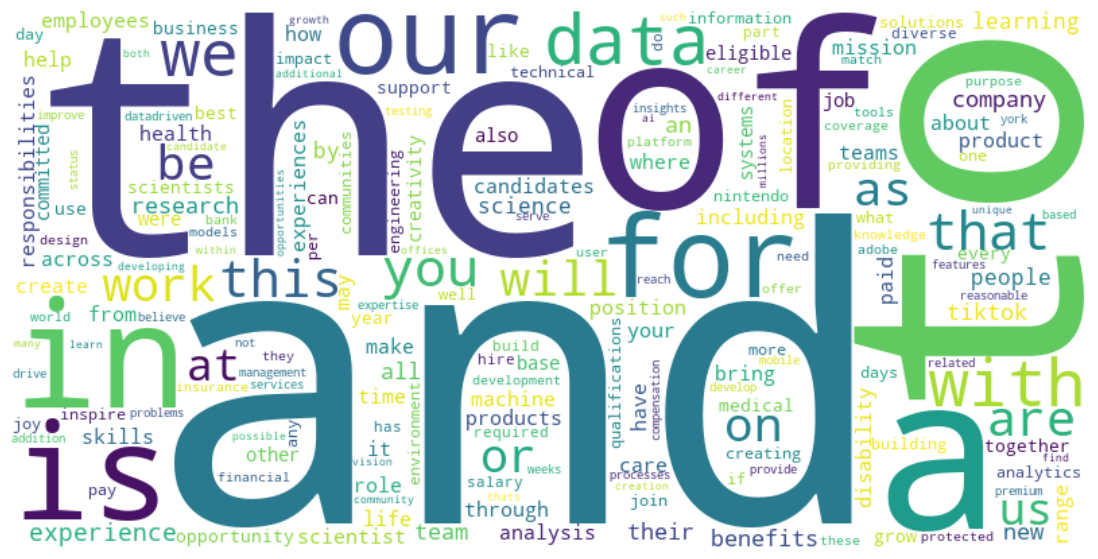

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re

text = ' '.join(data['Job Description'].dropna().tolist())

# Nettoyage et prétraitement du texte
text = re.sub(r'[^a-zA-Z\s]', '', text)  # Suppression des caractères non alphabétiques
text = text.lower()  # Conversion en minuscules

# Comptage des mots
word_counts = Counter(text.split())
most_common_words = word_counts.most_common(20)

# Création d'un nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Affichage du nuage de mots
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()